# SONM active deal analyzer

## This notebook is to analyze active deals on the SONM platform in real-time.

### Import necessary libraries

In [108]:
import pandas as pd
import numpy as np

In [109]:
import seaborn as sns

### ipython magic to plot in a notebook

In [110]:
%matplotlib inline

### SONM's DWH spits out API information of active deals.  Using Jupyter's magic to run BASH command to save the API data to livedeal.txt

In [111]:
!curl -s https://dwh.livenet.sonm.com:15022/DWHServer/GetDeals/ -d '{"status":1}' > livedeal.txt

### Open the saved text in Jupyter

In [112]:
f = open('livedeal.txt','r')

### Convert opened file to Pandas dataframe.

In [113]:
k = f.readlines()

In [114]:
r = k[0].split(',')

In [115]:
headposition = []
i = 0
for item in r:
    if 'deal' in item:

        headposition.append(i)
    i = i+1

In [116]:
testlist = []
for i in range(len(headposition)):
    if headposition[i]>0:
        #print(headposition[i-1], headposition[i])
        #print(r[headposition[i-1] : headposition[i]])
        testlist.append(r[headposition[i-1] : headposition[i]])

In [117]:
df = pd.DataFrame(testlist)

In [118]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,"{""deals"":[{""deal"":{""id"":""4839""","""benchmarks"":{""values"":[104",1949,16,512000000,67108864,1000000,1000000,2,6373244928,...,"""status"":1","""blockedBalance"":""663511099182188856""","""totalPayout"":""0""","""lastBillTS"":""2018-08-22T21:16:16Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4NG...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...",None
1,"{""deal"":{""id"":""4837""","""benchmarks"":{""values"":[114",1525,4,512000000,67108864,1000000,1000000,1,8513388544,...,"""status"":1","""blockedBalance"":""436741483005997728""","""totalPayout"":""0""","""lastBillTS"":""2018-08-22T21:15:43Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4NT...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...",None
2,"{""deal"":{""id"":""4836""","""benchmarks"":{""values"":[114",1525,4,512000000,67108864,1000000,1000000,1,11718885376,...,"""status"":1","""blockedBalance"":""527294171989791505""","""totalPayout"":""0""","""lastBillTS"":""2018-08-22T21:15:13Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4NT...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...",None
3,"{""deal"":{""id"":""3458""","""benchmarks"":{""values"":[1002",538,8,256000000,67108864,1000000,1000000,0,0,...,"""status"":1","""blockedBalance"":""1776104355885276""","""totalPayout"":""556611246635962471""","""lastBillTS"":""2018-08-22T21:11:46Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4MT...",None
4,"{""deal"":{""id"":""3457""","""benchmarks"":{""values"":[1004",513,6,256000000,67108864,1000000,1000000,0,0,...,"""status"":1","""blockedBalance"":""1776104355885276""","""totalPayout"":""556614691555652703""","""lastBillTS"":""2018-08-22T21:11:22Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4MT...",None


## Data Cleaning

### The 14 column contains consumer ID.  First clean this colum.

In [119]:
df[14]

0     "consumerID":"0x417c92FbD944b125A578848DE44a4F...
1     "consumerID":"0x417c92FbD944b125A578848DE44a4F...
2     "consumerID":"0x417c92FbD944b125A578848DE44a4F...
3     "consumerID":"0x18CB84498d67635F14BA20A7A5DD9F...
4     "consumerID":"0x18CB84498d67635F14BA20A7A5DD9F...
5     "consumerID":"0x18CB84498d67635F14BA20A7A5DD9F...
6     "consumerID":"0x417c92FbD944b125A578848DE44a4F...
7     "consumerID":"0x18CB84498d67635F14BA20A7A5DD9F...
8     "consumerID":"0x417c92FbD944b125A578848DE44a4F...
9     "consumerID":"0x18CB84498d67635F14BA20A7A5DD9F...
10    "consumerID":"0x49f6C95B97C209F814c5b3B13428E9...
11    "consumerID":"0x18CB84498d67635F14BA20A7A5DD9F...
12    "consumerID":"0x18CB84498d67635F14BA20A7A5DD9F...
13    "consumerID":"0x417c92FbD944b125A578848DE44a4F...
14    "consumerID":"0x18CB84498d67635F14BA20A7A5DD9F...
15    "consumerID":"0xc620838fcaec0e5559aa111f77FC60...
16    "consumerID":"0x417c92FbD944b125A578848DE44a4F...
17    "consumerID":"0xB4214d064518eed303D966F9ca

### Make a little funtion to trim unnecessary charactors

In [120]:
def Supplier_ID_conversion(content):
    return content[14:-1]

###  And applyt to pandas data frame.  New column called consumer_ID is generated.

In [121]:
df['consumer_ID'] = df[14].apply(Supplier_ID_conversion)

In [122]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,consumer_ID
0,"{""deals"":[{""deal"":{""id"":""4839""","""benchmarks"":{""values"":[104",1949,16,512000000,67108864,1000000,1000000,2,6373244928,...,"""blockedBalance"":""663511099182188856""","""totalPayout"":""0""","""lastBillTS"":""2018-08-22T21:16:16Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4NG...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...",None,0x417c92FbD944b125A578848DE44a4FD9132E0911
1,"{""deal"":{""id"":""4837""","""benchmarks"":{""values"":[114",1525,4,512000000,67108864,1000000,1000000,1,8513388544,...,"""blockedBalance"":""436741483005997728""","""totalPayout"":""0""","""lastBillTS"":""2018-08-22T21:15:43Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4NT...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...",None,0x417c92FbD944b125A578848DE44a4FD9132E0911
2,"{""deal"":{""id"":""4836""","""benchmarks"":{""values"":[114",1525,4,512000000,67108864,1000000,1000000,1,11718885376,...,"""blockedBalance"":""527294171989791505""","""totalPayout"":""0""","""lastBillTS"":""2018-08-22T21:15:13Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4NT...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...",None,0x417c92FbD944b125A578848DE44a4FD9132E0911
3,"{""deal"":{""id"":""3458""","""benchmarks"":{""values"":[1002",538,8,256000000,67108864,1000000,1000000,0,0,...,"""blockedBalance"":""1776104355885276""","""totalPayout"":""556611246635962471""","""lastBillTS"":""2018-08-22T21:11:46Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4MT...",None,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb
4,"{""deal"":{""id"":""3457""","""benchmarks"":{""values"":[1004",513,6,256000000,67108864,1000000,1000000,0,0,...,"""blockedBalance"":""1776104355885276""","""totalPayout"":""556614691555652703""","""lastBillTS"":""2018-08-22T21:11:22Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4MT...",None,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb


## supplier

###  Same trick for the supplier ID.  The 13 column contains supplier ID information.  Clean with the same function.

In [123]:
df[13]

0     "supplierID":"0xA0885038D127f628B3DC7f406004dE...
1     "supplierID":"0xC1bf17F560FA5BF79aF72B4314d147...
2     "supplierID":"0xC1bf17F560FA5BF79aF72B4314d147...
3     "supplierID":"0x7Cc1C96E6c20D6265531196d9ca2b3...
4     "supplierID":"0x8546601F9b4AcF1dc99C72cc48ED24...
5     "supplierID":"0x730F19B7FA079EBfDc7360066ec593...
6     "supplierID":"0x734C2a165e57496169aAAEA6E22aE7...
7     "supplierID":"0x47012859fC5cB44d6106D54ff77580...
8     "supplierID":"0x33f81Ee6f9d4716B1C13bA58FdAE5a...
9     "supplierID":"0xaE7DB91DeC00E3Be062C7dC3328859...
10    "supplierID":"0xAe4fD4581D82C615105c798c73d1C3...
11    "supplierID":"0xd8B606a3D19C53E6Eea84ca5738D7D...
12    "supplierID":"0x70eC78FAF2CcD3fA3fe9567Fa5B835...
13    "supplierID":"0x33f81Ee6f9d4716B1C13bA58FdAE5a...
14    "supplierID":"0x672Ee945a55327328472B1a0243729...
15    "supplierID":"0x323FB5f356088ae979F12f27f94013...
16    "supplierID":"0x2f1B94E3813d66967a478031889F23...
17    "supplierID":"0x844cae5EADD22CaE667F37388D

In [124]:
df['supplier_ID'] = df[13].apply(Supplier_ID_conversion)

### Price

### Price value is shown as USD/s, so conver it to USD/h

In [125]:
unit = 10.0**18.0

4830442500000/unit * 60 *60

In [126]:
def Price_conversion(content):
    if 'price' in content:
        return float(content[9:-1])/unit * 60 *60
    if 'duration' in content:
        return float(content[11:-1])/unit * 60 * 60

In [127]:
df['price_USD/h'] = df[18].apply(Price_conversion)

###  ETH has rate

### The 10 column contains Ethash value.  Clean and convert to Mh/s.

In [128]:
df[10]

0      39671000
1      26663000
2      32454000
3             0
4             0
5      12220000
6      19778000
7      22179000
8      21715000
9             0
10            0
11    159643000
12    129860000
13     21707000
14    186411000
15            0
16     30105000
17            0
18            0
19            0
20            0
21            0
22     64894000
23     85636000
24            0
25            0
26    219539000
27     21959000
28            0
29            0
30            0
31            0
32            0
Name: 10, dtype: object

In [129]:
float(df[10][0])/1000000

39.671

In [130]:
def Ethash_conversion(content):
    return float(content)/1000000

In [131]:
Ethash_conversion(df[10][0])

39.671

In [132]:
df['Ethash'] = df[10].apply(Ethash_conversion)

In [133]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,consumer_ID,supplier_ID,price_USD/h,Ethash
0,"{""deals"":[{""deal"":{""id"":""4839""","""benchmarks"":{""values"":[104",1949,16,512000000,67108864,1000000,1000000,2,6373244928,...,"""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4NG...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...",None,0x417c92FbD944b125A578848DE44a4FD9132E0911,0xA0885038D127f628B3DC7f406004dE104d0bF496,0.033887,39.671
1,"{""deal"":{""id"":""4837""","""benchmarks"":{""values"":[114",1525,4,512000000,67108864,1000000,1000000,1,8513388544,...,"""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4NT...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...",None,0x417c92FbD944b125A578848DE44a4FD9132E0911,0xC1bf17F560FA5BF79aF72B4314d14706b90ad2cE,0.023186,26.663
2,"{""deal"":{""id"":""4836""","""benchmarks"":{""values"":[114",1525,4,512000000,67108864,1000000,1000000,1,11718885376,...,"""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4NT...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...",None,0x417c92FbD944b125A578848DE44a4FD9132E0911,0xC1bf17F560FA5BF79aF72B4314d14706b90ad2cE,0.028091,32.454
3,"{""deal"":{""id"":""3458""","""benchmarks"":{""values"":[1002",538,8,256000000,67108864,1000000,1000000,0,0,...,"""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4MT...",None,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0x7Cc1C96E6c20D6265531196d9ca2b3199fF8Ef9E,0.000100,0.000
4,"{""deal"":{""id"":""3457""","""benchmarks"":{""values"":[1004",513,6,256000000,67108864,1000000,1000000,0,0,...,"""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4MT...",None,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0x8546601F9b4AcF1dc99C72cc48ED243d119cca95,0.000100,0.000


# Run statistics for suppliers

In [134]:
df.groupby('supplier_ID').describe()['Ethash']

,count,mean,std,min,25%,50%,75%,max
supplier_ID,,,,,,,,
0x1E575FB7dD8b28CEcAD9065A7aFD1aC6c2fBA797,1.0,21.9590,NaN,21.959,21.95900,21.9590,21.95900,21.959
0x26200241593722FA17DE5722Ed66d8830dc58C6D,1.0,219.5390,NaN,219.539,219.53900,219.5390,219.53900,219.539
0x2f1B94E3813d66967a478031889F230D805130Ec,1.0,30.1050,NaN,30.105,30.10500,30.1050,30.10500,30.105
0x323FB5f356088ae979F12f27f94013e449BC62df,1.0,0.0000,NaN,0.000,0.00000,0.0000,0.00000,0.000
0x33f81Ee6f9d4716B1C13bA58FdAE5a1fa9f995d2,2.0,21.7110,0.005657,21.707,21.70900,21.7110,21.71300,21.715
0x37d7Ae51C3421474709331898B278D8bAB66eCac,1.0,85.6360,NaN,85.636,85.63600,85.6360,85.63600,85.636
0x47012859fC5cB44d6106D54ff77580c85C380ecc,1.0,22.1790,NaN,22.179,22.17900,22.1790,22.17900,22.179
0x672Ee945a55327328472B1a02437293945157f4C,1.0,186.4110,NaN,186.411,186.41100,186.4110,186.41100,186.411
0x70eC78FAF2CcD3fA3fe9567Fa5B8354Faa4e9457,1.0,129.8600,NaN,129.860,129.86000,129.8600,129.86000,129.860


In [135]:
df10 = df.groupby('supplier_ID').describe()['Ethash']

In [136]:
df10.to_csv('eth.csv')

In [137]:
df11 = pd.read_csv('eth.csv')

In [138]:
df11['total_Ethash']= df11['count']*df11['mean']

In [139]:
df11[['supplier_ID','total_Ethash','count']]

,supplier_ID,total_Ethash,count
0,0x1E575FB7dD8b28CEcAD9065A7aFD1aC6c2fBA797,21.959,1.0
1,0x26200241593722FA17DE5722Ed66d8830dc58C6D,219.539,1.0
2,0x2f1B94E3813d66967a478031889F230D805130Ec,30.105,1.0
3,0x323FB5f356088ae979F12f27f94013e449BC62df,0.000,1.0
4,0x33f81Ee6f9d4716B1C13bA58FdAE5a1fa9f995d2,43.422,2.0
5,0x37d7Ae51C3421474709331898B278D8bAB66eCac,85.636,1.0
6,0x47012859fC5cB44d6106D54ff77580c85C380ecc,22.179,1.0
7,0x672Ee945a55327328472B1a02437293945157f4C,186.411,1.0
8,0x70eC78FAF2CcD3fA3fe9567Fa5B8354Faa4e9457,129.860,1.0
9,0x730F19B7FA079EBfDc7360066ec593e4Bdd46Bf2,12.220,1.0


In [140]:
df11[['supplier_ID','total_Ethash','count']].sort_values('total_Ethash', ascending = False)

,supplier_ID,total_Ethash,count
1,0x26200241593722FA17DE5722Ed66d8830dc58C6D,219.539,1.0
7,0x672Ee945a55327328472B1a02437293945157f4C,186.411,1.0
24,0xd8B606a3D19C53E6Eea84ca5738D7D7d2c0eeb5f,159.643,1.0
8,0x70eC78FAF2CcD3fA3fe9567Fa5B8354Faa4e9457,129.860,1.0
5,0x37d7Ae51C3421474709331898B278D8bAB66eCac,85.636,1.0
12,0x7E74e1034bD9270482Fd286F03Cf7Fa26Bb99805,64.894,1.0
19,0xC1bf17F560FA5BF79aF72B4314d14706b90ad2cE,59.117,2.0
4,0x33f81Ee6f9d4716B1C13bA58FdAE5a1fa9f995d2,43.422,2.0
17,0xA0885038D127f628B3DC7f406004dE104d0bF496,39.671,1.0
2,0x2f1B94E3813d66967a478031889F230D805130Ec,30.105,1.0


In [141]:
df12 = df11[['supplier_ID','total_Ethash','count']].sort_values('total_Ethash', ascending = False)

In [142]:
df12.to_csv('ethash.csv', index = False)

In [143]:
df13 = pd.read_csv('ethash.csv')

In [144]:
df13

,supplier_ID,total_Ethash,count
0,0x26200241593722FA17DE5722Ed66d8830dc58C6D,219.539,1.0
1,0x672Ee945a55327328472B1a02437293945157f4C,186.411,1.0
2,0xd8B606a3D19C53E6Eea84ca5738D7D7d2c0eeb5f,159.643,1.0
3,0x70eC78FAF2CcD3fA3fe9567Fa5B8354Faa4e9457,129.860,1.0
4,0x37d7Ae51C3421474709331898B278D8bAB66eCac,85.636,1.0
5,0x7E74e1034bD9270482Fd286F03Cf7Fa26Bb99805,64.894,1.0
6,0xC1bf17F560FA5BF79aF72B4314d14706b90ad2cE,59.117,2.0
7,0x33f81Ee6f9d4716B1C13bA58FdAE5a1fa9f995d2,43.422,2.0
8,0xA0885038D127f628B3DC7f406004dE104d0bF496,39.671,1.0
9,0x2f1B94E3813d66967a478031889F230D805130Ec,30.105,1.0


In [145]:
df13['total_Ethash'].sum()

1094.434

In [146]:
print('Real-time total Ethash rate of the entire SONM platform is '+ str(df13['total_Ethash'].sum()) +' Mh/s')

Real-time total Ethash rate of the entire SONM platform is 1094.434 Mh/s


## supplier's revenue

In [147]:
df13['supplier_ID'][0]

'0x26200241593722FA17DE5722Ed66d8830dc58C6D'

In [148]:
df[df.supplier_ID == df13['supplier_ID'][0]]['price_USD/h'].sum()

0.22599999999999718

In [149]:
def total_revenue(address):
    return df[df.supplier_ID == address]['price_USD/h'].sum()

In [150]:
total_revenue(df13['supplier_ID'][0])

0.22599999999999718

In [151]:
df13['total_revenue_USD/h'] = df13['supplier_ID'].apply(total_revenue)

In [152]:
df13.dtypes

supplier_ID             object
total_Ethash           float64
count                  float64
total_revenue_USD/h    float64
dtype: object

In [153]:
df13['total_revenue_USD/d'] = df13['total_revenue_USD/h'] *24

In [154]:
df13['revenue_USD/d'] = df13['total_revenue_USD/d'].map('${:,.2f}'.format)

In [155]:
df13.head()

,supplier_ID,total_Ethash,count,total_revenue_USD/h,total_revenue_USD/d,revenue_USD/d
0,0x26200241593722FA17DE5722Ed66d8830dc58C6D,219.539,1.0,0.226000,5.424000,$5.42
1,0x672Ee945a55327328472B1a02437293945157f4C,186.411,1.0,0.186366,4.472783,$4.47
2,0xd8B606a3D19C53E6Eea84ca5738D7D7d2c0eeb5f,159.643,1.0,0.162238,3.893711,$3.89
3,0x70eC78FAF2CcD3fA3fe9567Fa5B8354Faa4e9457,129.860,1.0,0.141309,3.391426,$3.39
4,0x37d7Ae51C3421474709331898B278D8bAB66eCac,85.636,1.0,0.080092,1.922216,$1.92


In [161]:
sns.set()

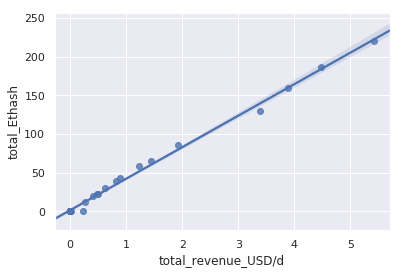

In [162]:
sns.regplot(y="total_Ethash", x="total_revenue_USD/d", data=df13)

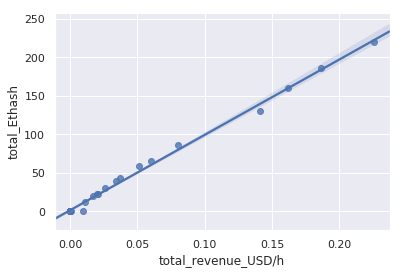

In [163]:
sns.regplot(y="total_Ethash", x="total_revenue_USD/h", data=df13)

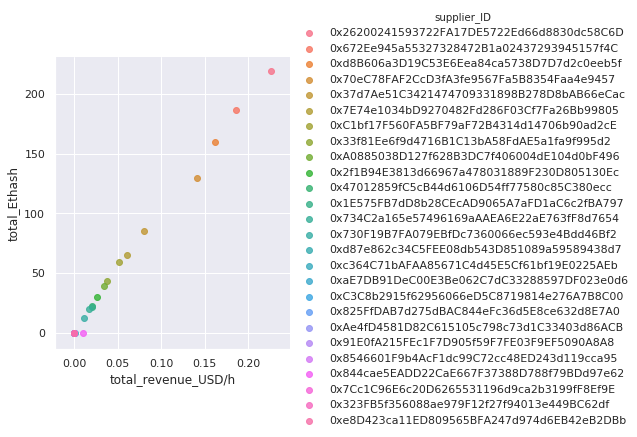

In [170]:
sns.lmplot( y="total_Ethash", x="total_revenue_USD/h", data=df13, fit_reg=False, hue='supplier_ID', legend=True)

In [171]:
df13[['supplier_ID','total_Ethash','count','revenue_USD/d']]

,supplier_ID,total_Ethash,count,revenue_USD/d
0,0x26200241593722FA17DE5722Ed66d8830dc58C6D,219.539,1.0,$5.42
1,0x672Ee945a55327328472B1a02437293945157f4C,186.411,1.0,$4.47
2,0xd8B606a3D19C53E6Eea84ca5738D7D7d2c0eeb5f,159.643,1.0,$3.89
3,0x70eC78FAF2CcD3fA3fe9567Fa5B8354Faa4e9457,129.860,1.0,$3.39
4,0x37d7Ae51C3421474709331898B278D8bAB66eCac,85.636,1.0,$1.92
5,0x7E74e1034bD9270482Fd286F03Cf7Fa26Bb99805,64.894,1.0,$1.45
6,0xC1bf17F560FA5BF79aF72B4314d14706b90ad2cE,59.117,2.0,$1.23
7,0x33f81Ee6f9d4716B1C13bA58FdAE5a1fa9f995d2,43.422,2.0,$0.90
8,0xA0885038D127f628B3DC7f406004dE104d0bF496,39.671,1.0,$0.81
9,0x2f1B94E3813d66967a478031889F230D805130Ec,30.105,1.0,$0.62


In [172]:
df13['total_revenue_USD/d'].sum()

26.043871154664238

In [173]:
df13['total_revenue_USD/d'].sum()

26.043871154664238

In [174]:
"{:.2f}".format(df13['total_revenue_USD/d'].sum())

'26.04'

In [175]:
print('At this moment, total ' + str("{:.2f}".format(df13['total_revenue_USD/d'].sum())) + ' USD/day is spent on the entire SONM platform.')

At this moment, total 26.04 USD/day is spent on the entire SONM platform.


# Run the same statistics for consumers

In [176]:
df.groupby('consumer_ID').describe()['Ethash']

,count,mean,std,min,25%,50%,75%,max
consumer_ID,,,,,,,,
0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,16.0,55.023875,77.045399,0.000,0.000,6.110,96.6920,219.539
0x417c92FbD944b125A578848DE44a4FD9132E0911,7.0,27.441857,7.150672,19.778,21.711,26.663,31.2795,39.671
0x49f6C95B97C209F814c5b3B13428E91686a1FEd9,3.0,0.000000,0.000000,0.000,0.000,0.000,0.0000,0.000
0x6f74D76F4c4b80A61598bdED7Fca2f660CA742Ce,1.0,0.000000,NaN,0.000,0.000,0.000,0.0000,0.000
0xAAA932d77935EE3d8E0Ba1d464CFDA4E56566A01,1.0,21.959000,NaN,21.959,21.959,21.959,21.9590,21.959
0xB4214d064518eed303D966F9ca0Fc62Ac8dF20EE,1.0,0.000000,NaN,0.000,0.000,0.000,0.0000,0.000
0xEe7Ff0a44C62209aa7dAa450F673415bC90bFC11,1.0,0.000000,NaN,0.000,0.000,0.000,0.0000,0.000
0xF044524c6A30bC7559DEa1CB21fA11b1f5817833,1.0,0.000000,NaN,0.000,0.000,0.000,0.0000,0.000
0xc620838fcaec0e5559aa111f77FC6016650c63E4,1.0,0.000000,NaN,0.000,0.000,0.000,0.0000,0.000


In [177]:
df10 = df.groupby('consumer_ID').describe()['Ethash']

In [178]:
df10.to_csv('consumer.csv')

In [179]:
df11 = pd.read_csv('consumer.csv')

In [180]:
df11['total_Ethash']= df11['mean']*df11['count']

In [181]:
df11

,consumer_ID,count,mean,std,min,25%,50%,75%,max,total_Ethash
0,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,16.0,55.023875,77.045399,0.000,0.000,6.110,96.6920,219.539,880.382
1,0x417c92FbD944b125A578848DE44a4FD9132E0911,7.0,27.441857,7.150672,19.778,21.711,26.663,31.2795,39.671,192.093
2,0x49f6C95B97C209F814c5b3B13428E91686a1FEd9,3.0,0.000000,0.000000,0.000,0.000,0.000,0.0000,0.000,0.000
3,0x6f74D76F4c4b80A61598bdED7Fca2f660CA742Ce,1.0,0.000000,NaN,0.000,0.000,0.000,0.0000,0.000,0.000
4,0xAAA932d77935EE3d8E0Ba1d464CFDA4E56566A01,1.0,21.959000,NaN,21.959,21.959,21.959,21.9590,21.959,21.959
5,0xB4214d064518eed303D966F9ca0Fc62Ac8dF20EE,1.0,0.000000,NaN,0.000,0.000,0.000,0.0000,0.000,0.000
6,0xEe7Ff0a44C62209aa7dAa450F673415bC90bFC11,1.0,0.000000,NaN,0.000,0.000,0.000,0.0000,0.000,0.000
7,0xF044524c6A30bC7559DEa1CB21fA11b1f5817833,1.0,0.000000,NaN,0.000,0.000,0.000,0.0000,0.000,0.000
8,0xc620838fcaec0e5559aa111f77FC6016650c63E4,1.0,0.000000,NaN,0.000,0.000,0.000,0.0000,0.000,0.000
9,0xe7517190DB97Ea55E985abdA33745AfC41a83592,1.0,0.000000,NaN,0.000,0.000,0.000,0.0000,0.000,0.000


In [182]:
def total_expense(address):
    return df[df.consumer_ID == address]['price_USD/h'].sum()

In [183]:
df11['total_expense_USD/h'] = df11['consumer_ID'].apply(total_expense)

In [184]:
df11['total_expense_USD/d'] = df11['total_expense_USD/h'] *24

In [185]:
df11['expense_USD/d'] = df11['total_expense_USD/d'].map('${:,.2f}'.format)

In [186]:
df11.head()

,consumer_ID,count,mean,std,min,25%,50%,75%,max,total_Ethash,total_expense_USD/h,total_expense_USD/d,expense_USD/d
0,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,16.0,55.023875,77.045399,0.000,0.000,6.110,96.6920,219.539,880.382,8.891512e-01,2.133963e+01,$21.34
1,0x417c92FbD944b125A578848DE44a4FD9132E0911,7.0,27.441857,7.150672,19.778,21.711,26.663,31.2795,39.671,192.093,1.658700e-01,3.980879e+00,$3.98
2,0x49f6C95B97C209F814c5b3B13428E91686a1FEd9,3.0,0.000000,0.000000,0.000,0.000,0.000,0.0000,0.000,0.000,0.000000e+00,0.000000e+00,$0.00
3,0x6f74D76F4c4b80A61598bdED7Fca2f660CA742Ce,1.0,0.000000,NaN,0.000,0.000,0.000,0.0000,0.000,0.000,3.110400e-10,7.464960e-09,$0.00
4,0xAAA932d77935EE3d8E0Ba1d464CFDA4E56566A01,1.0,21.959000,NaN,21.959,21.959,21.959,21.9590,21.959,21.959,2.014018e-02,4.833642e-01,$0.48


In [187]:
df11[['consumer_ID', 'total_Ethash', 'count','expense_USD/d']]

,consumer_ID,total_Ethash,count,expense_USD/d
0,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,880.382,16.0,$21.34
1,0x417c92FbD944b125A578848DE44a4FD9132E0911,192.093,7.0,$3.98
2,0x49f6C95B97C209F814c5b3B13428E91686a1FEd9,0.000,3.0,$0.00
3,0x6f74D76F4c4b80A61598bdED7Fca2f660CA742Ce,0.000,1.0,$0.00
4,0xAAA932d77935EE3d8E0Ba1d464CFDA4E56566A01,21.959,1.0,$0.48
5,0xB4214d064518eed303D966F9ca0Fc62Ac8dF20EE,0.000,1.0,$0.24
6,0xEe7Ff0a44C62209aa7dAa450F673415bC90bFC11,0.000,1.0,$0.00
7,0xF044524c6A30bC7559DEa1CB21fA11b1f5817833,0.000,1.0,$0.00
8,0xc620838fcaec0e5559aa111f77FC6016650c63E4,0.000,1.0,$0.00
9,0xe7517190DB97Ea55E985abdA33745AfC41a83592,0.000,1.0,$0.00


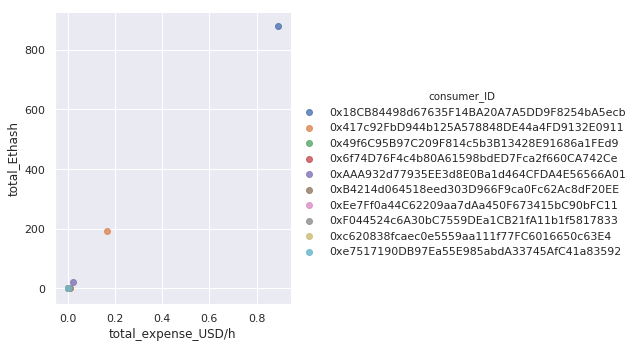

In [188]:
sns.lmplot( y="total_Ethash", x="total_expense_USD/h", data=df11, fit_reg=False, hue='consumer_ID', legend=True)

# Connor's deals

In [189]:
df[df.consumer_ID == '0x417c92FbD944b125A578848DE44a4FD9132E0911']

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,consumer_ID,supplier_ID,price_USD/h,Ethash
0,"{""deals"":[{""deal"":{""id"":""4839""","""benchmarks"":{""values"":[104",1949,16,512000000,67108864,1000000,1000000,2,6373244928,...,"""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4NG...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...",None,0x417c92FbD944b125A578848DE44a4FD9132E0911,0xA0885038D127f628B3DC7f406004dE104d0bF496,0.033887,39.671
1,"{""deal"":{""id"":""4837""","""benchmarks"":{""values"":[114",1525,4,512000000,67108864,1000000,1000000,1,8513388544,...,"""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4NT...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...",None,0x417c92FbD944b125A578848DE44a4FD9132E0911,0xC1bf17F560FA5BF79aF72B4314d14706b90ad2cE,0.023186,26.663
2,"{""deal"":{""id"":""4836""","""benchmarks"":{""values"":[114",1525,4,512000000,67108864,1000000,1000000,1,11718885376,...,"""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4NT...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...",None,0x417c92FbD944b125A578848DE44a4FD9132E0911,0xC1bf17F560FA5BF79aF72B4314d14706b90ad2cE,0.028091,32.454
6,"{""deal"":{""id"":""4835""","""benchmarks"":{""values"":[108",1113,8,512000000,67108864,1000000,1000001,1,6368002048,...,"""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4Nk...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...",None,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x734C2a165e57496169aAAEA6E22aE763fF8d7654,0.017390,19.778
8,"{""deal"":{""id"":""4830""","""benchmarks"":{""values"":[109",1522,8,512000000,67108864,1000000,1000000,1,4292050944,...,"""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4Yj...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...",None,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x33f81Ee6f9d4716B1C13bA58FdAE5a1fa9f995d2,0.018727,21.715
13,"{""deal"":{""id"":""4818""","""benchmarks"":{""values"":[109",1522,8,512000000,67108864,1000000,1000000,1,4292050944,...,"""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4Yj...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...",None,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x33f81Ee6f9d4716B1C13bA58FdAE5a1fa9f995d2,0.018727,21.707
16,"{""deal"":{""id"":""4798""","""benchmarks"":{""values"":[104",1062,4,512000000,67108864,1000000,1000000,1,8512339968,...,"""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...",None,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x2f1B94E3813d66967a478031889F230D805130Ec,0.025861,30.105


In [190]:
df12 = df[df.consumer_ID == '0x417c92FbD944b125A578848DE44a4FD9132E0911']

In [191]:
df12[['consumer_ID', 'supplier_ID', 'price_USD/h', 'Ethash',0]]

,consumer_ID,supplier_ID,price_USD/h,Ethash,0
0,0x417c92FbD944b125A578848DE44a4FD9132E0911,0xA0885038D127f628B3DC7f406004dE104d0bF496,0.033887,39.671,"{""deals"":[{""deal"":{""id"":""4839"""
1,0x417c92FbD944b125A578848DE44a4FD9132E0911,0xC1bf17F560FA5BF79aF72B4314d14706b90ad2cE,0.023186,26.663,"{""deal"":{""id"":""4837"""
2,0x417c92FbD944b125A578848DE44a4FD9132E0911,0xC1bf17F560FA5BF79aF72B4314d14706b90ad2cE,0.028091,32.454,"{""deal"":{""id"":""4836"""
6,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x734C2a165e57496169aAAEA6E22aE763fF8d7654,0.017390,19.778,"{""deal"":{""id"":""4835"""
8,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x33f81Ee6f9d4716B1C13bA58FdAE5a1fa9f995d2,0.018727,21.715,"{""deal"":{""id"":""4830"""
13,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x33f81Ee6f9d4716B1C13bA58FdAE5a1fa9f995d2,0.018727,21.707,"{""deal"":{""id"":""4818"""
16,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x2f1B94E3813d66967a478031889F230D805130Ec,0.025861,30.105,"{""deal"":{""id"":""4798"""


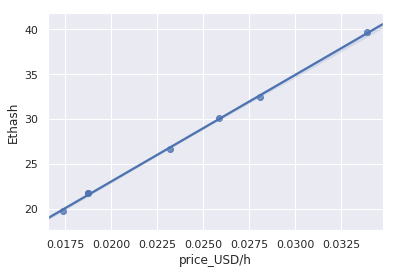

In [193]:
sns.regplot( y="Ethash", x="price_USD/h", data=df12)

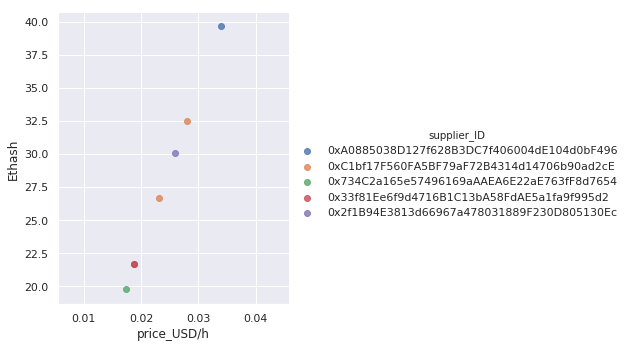

In [192]:
sns.lmplot( y="Ethash", x="price_USD/h", data=df12, fit_reg=False, hue='supplier_ID', legend=True)